In [33]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [35]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [36]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [37]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [38]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [39]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [40]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6429cfb45877364bbc32c8a0cae69f0d


In [41]:
city_data_df = pd.read_csv("weather_data/cities.csv")
print(city_data_df)

     City_ID            City      Lat       Lng  Max Temp  Humidity  \
0          0          Yining  29.0361  114.5636     38.25        86   
1          1     Yellowknife  62.4560 -114.3525     -6.59        81   
2          2        Hermanus -34.4187   19.2345     71.91        86   
3          3            Hilo  19.7297 -155.0900     77.79        58   
4          4      Port Hardy  50.6996 -127.4199     43.75        93   
..       ...             ...      ...       ...       ...       ...   
571      571  Elizabeth City  36.2946  -76.2511     36.01        51   
572      572           Beira -19.8436   34.8389     77.09        88   
573      573           Alvor  37.1299   -8.5917     51.67        57   
574      574       Kushmurun  52.4503   64.6311     14.29        96   
575      575        Kedrovyy  56.1667   91.8167    -14.13        95   

     Cloudiness  Wind Speed Country                 Date  
0           100        1.07      CN  2022-01-30 22:19:07  
1            75        8.05  

In [42]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | meulaboh
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | dalmau
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | dire
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | kahului
Processing Record 11 of Set 1 | puerto carreno
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | sur
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | roebourne
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | verkh-chebula
Processing Record 22 of Set 1 | hobart
Process

City not found. Skipping...
Processing Record 40 of Set 4 | kodinsk
Processing Record 41 of Set 4 | antofagasta
Processing Record 42 of Set 4 | clarksburg
Processing Record 43 of Set 4 | east london
Processing Record 44 of Set 4 | saleaula
City not found. Skipping...
Processing Record 45 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 46 of Set 4 | grand gaube
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | noumea
Processing Record 49 of Set 4 | constitucion
Processing Record 50 of Set 4 | aguimes
Processing Record 1 of Set 5 | padang
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | kachug
Processing Record 4 of Set 5 | muli
Processing Record 5 of Set 5 | nuuk
Processing Record 6 of Set 5 | laguna
Processing Record 7 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 8 of Set 5 | birao
Processing Record 9 of Set 5 | maitum
Processing Record 10 of Set 5 | nouadhibou
Processing Record 11 of Set 5 | bo

Processing Record 29 of Set 8 | buala
Processing Record 30 of Set 8 | jinchang
Processing Record 31 of Set 8 | balashov
Processing Record 32 of Set 8 | ancud
Processing Record 33 of Set 8 | kutum
Processing Record 34 of Set 8 | longyearbyen
Processing Record 35 of Set 8 | veriora
Processing Record 36 of Set 8 | lar
Processing Record 37 of Set 8 | uwayl
City not found. Skipping...
Processing Record 38 of Set 8 | ballina
Processing Record 39 of Set 8 | the valley
Processing Record 40 of Set 8 | nabire
Processing Record 41 of Set 8 | berea
Processing Record 42 of Set 8 | tandil
Processing Record 43 of Set 8 | morrope
Processing Record 44 of Set 8 | amderma
City not found. Skipping...
Processing Record 45 of Set 8 | pasuruan
Processing Record 46 of Set 8 | boralday
Processing Record 47 of Set 8 | saint anthony
Processing Record 48 of Set 8 | iraan
Processing Record 49 of Set 8 | te anau
Processing Record 50 of Set 8 | vaitape
Processing Record 1 of Set 9 | tawnat
City not found. Skipping..

Processing Record 19 of Set 12 | vauvert
Processing Record 20 of Set 12 | sacuieu
City not found. Skipping...
Processing Record 21 of Set 12 | lincoln
Processing Record 22 of Set 12 | gisborne
Processing Record 23 of Set 12 | mayo
Processing Record 24 of Set 12 | bowen
Processing Record 25 of Set 12 | kidal
Processing Record 26 of Set 12 | kuche
City not found. Skipping...
Processing Record 27 of Set 12 | okha
Processing Record 28 of Set 12 | roald
Processing Record 29 of Set 12 | marzuq
Processing Record 30 of Set 12 | portland
Processing Record 31 of Set 12 | vanimo
Processing Record 32 of Set 12 | randolph
Processing Record 33 of Set 12 | sorland
Processing Record 34 of Set 12 | matay
Processing Record 35 of Set 12 | sterling
Processing Record 36 of Set 12 | rawlins
Processing Record 37 of Set 12 | enshi
Processing Record 38 of Set 12 | mikhaylovka
Processing Record 39 of Set 12 | burns lake
Processing Record 40 of Set 12 | chumikan
Processing Record 41 of Set 12 | dunedin
Processin

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Meulaboh,4.1363,96.1285,76.21,87,80,3.04,ID,2022-01-30 23:01:22
1,Kapaa,22.0752,-159.3190,81.48,82,10,1.99,US,2022-01-30 23:00:28
2,Mataura,-46.1927,168.8643,72.48,58,46,1.70,NZ,2022-01-30 23:00:34
3,Torbay,47.6666,-52.7314,37.76,81,75,25.32,CA,2022-01-30 23:02:38
4,Dalmau,26.0667,81.0333,52.41,65,0,1.54,IN,2022-01-30 23:02:48
5,Punta Arenas,-53.1500,-70.9167,51.12,50,59,22.10,CL,2022-01-30 23:02:49
6,Faanui,-16.4833,-151.7500,80.83,72,15,10.51,PF,2022-01-30 22:58:03
7,Dire,12.2833,-10.9667,79.84,15,16,1.39,ML,2022-01-30 23:02:49
8,Ushuaia,-54.8000,-68.3000,46.06,66,75,29.93,AR,2022-01-30 22:58:30
9,Kahului,20.8947,-156.4700,80.83,59,7,11.01,US,2022-01-30 23:02:50


In [44]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
reordered_city_data_df = city_data_df[new_column_order]
reordered_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Meulaboh,ID,2022-01-30 23:01:22,4.1363,96.1285,76.21,87,80,3.04
1,Kapaa,US,2022-01-30 23:00:28,22.0752,-159.3190,81.48,82,10,1.99
2,Mataura,NZ,2022-01-30 23:00:34,-46.1927,168.8643,72.48,58,46,1.70
3,Torbay,CA,2022-01-30 23:02:38,47.6666,-52.7314,37.76,81,75,25.32
4,Dalmau,IN,2022-01-30 23:02:48,26.0667,81.0333,52.41,65,0,1.54
5,Punta Arenas,CL,2022-01-30 23:02:49,-53.1500,-70.9167,51.12,50,59,22.10
6,Faanui,PF,2022-01-30 22:58:03,-16.4833,-151.7500,80.83,72,15,10.51
7,Dire,ML,2022-01-30 23:02:49,12.2833,-10.9667,79.84,15,16,1.39
8,Ushuaia,AR,2022-01-30 22:58:30,-54.8000,-68.3000,46.06,66,75,29.93
9,Kahului,US,2022-01-30 23:02:50,20.8947,-156.4700,80.83,59,7,11.01


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

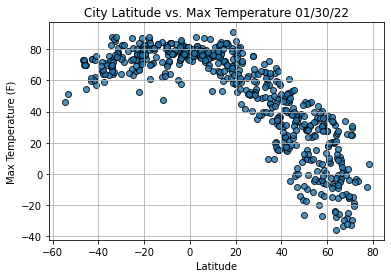

In [47]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

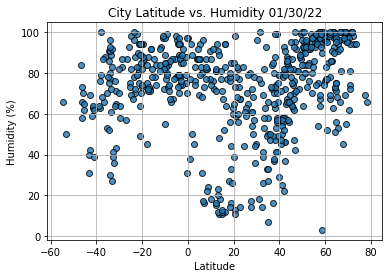

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

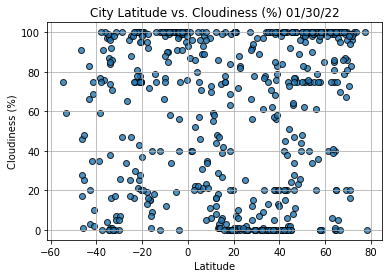

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

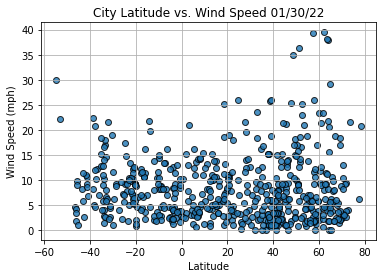

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [78]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [79]:
index13 = city_data_df.loc[13]
index13

City                  Yellowknife
Lat                        62.456
Lng                     -114.3525
Max Temp                    -6.59
Humidity                       86
Cloudiness                    100
Wind Speed                   8.01
Country                        CA
Date          2022-01-30 23:01:22
Name: 13, dtype: object

In [80]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Meulaboh,4.1363,96.1285,76.21,87,80,3.04,ID,2022-01-30 23:01:22
1,Kapaa,22.0752,-159.3190,81.48,82,10,1.99,US,2022-01-30 23:00:28
3,Torbay,47.6666,-52.7314,37.76,81,75,25.32,CA,2022-01-30 23:02:38
4,Dalmau,26.0667,81.0333,52.41,65,0,1.54,IN,2022-01-30 23:02:48
7,Dire,12.2833,-10.9667,79.84,15,16,1.39,ML,2022-01-30 23:02:49


In [81]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

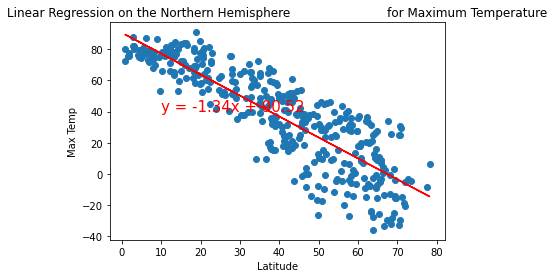

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

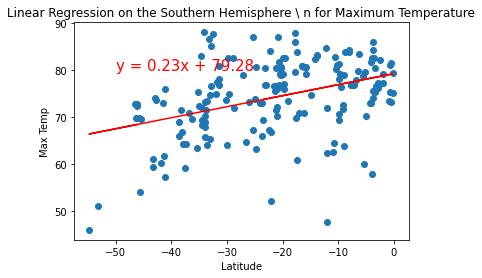

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ n for Maximum Temperature', 'Max Temp',(-50,80))

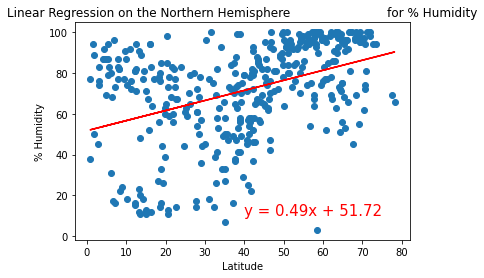

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

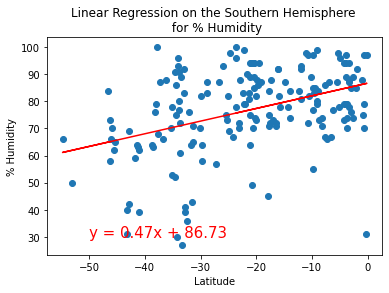

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,30))

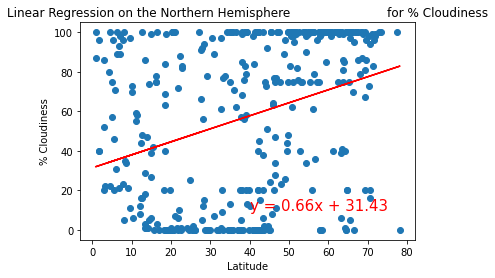

In [99]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40, 10))

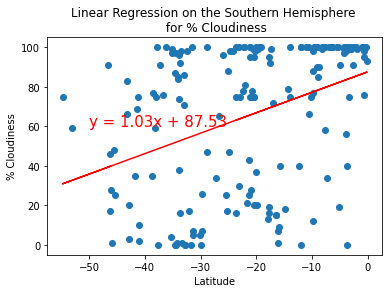

In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

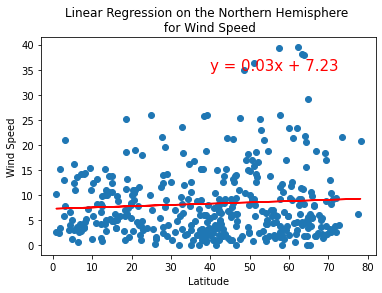

In [108]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

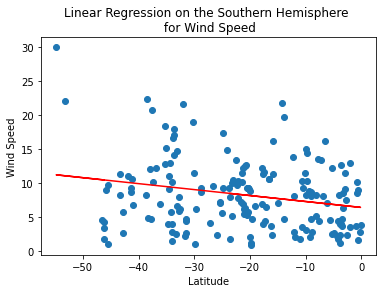

In [115]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))